In [1]:
import GCRCatalogs
import numpy as np
from astropy.table import Table
from GCR import GCRQuery
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
cats=GCRCatalogs.get_available_catalogs()
cats.keys()

dict_keys(['buzzard', 'buzzard_high-res', 'cosmoDC2_v1.1.4_image', 'cosmoDC2_v1.1.4_redmapper_v0.7.5', 'cosmoDC2_v1.1.4_small', 'dc2_object_run1.2i', 'dc2_object_run1.2i_all_columns', 'dc2_object_run1.2i_tract4850', 'dc2_object_run1.2i_with_photoz', 'dc2_object_run1.2p', 'dc2_object_run1.2p_all_columns', 'dc2_object_run1.2p_tract4850', 'dc2_object_run2.2i_dr2_wfd', 'dc2_object_run2.2i_dr2_wfd_with_addons', 'dc2_object_run2.2i_dr3a', 'dc2_object_run2.2i_dr3a_with_metacal', 'dc2_object_run2.2i_dr3a_with_photoz', 'dc2_object_run2.2i_dr6', 'dc2_object_run2.2i_dr6_with_addons', 'dc2_truth_run1.2_static', 'dc2_truth_run1.2_variable_lightcurve', 'dc2_truth_run1.2_variable_summary', 'dc2_truth_run2.2i_galaxy_truth_summary', 'dc2_truth_run2.2i_sn_truth_summary', 'dc2_truth_run2.2i_sn_variability_truth', 'dc2_truth_run2.2i_star_lc_stats', 'dc2_truth_run2.2i_star_truth_summary', 'dc2_truth_run2.2i_star_variability_truth', 'dc2_truth_run2.2i_summary_tract_partition', 'dc2_truth_run3.1i_agn_auxilia

In [3]:
cats['cosmoDC2_v1.1.4_small']
cats['cosmoDC2_v1.1.4_image']
print("dc2 sky area", cats['cosmoDC2_v1.1.4_image']["sky_area"])
cats["skysim5000_v1.1.1"]

dc2 sky area 439.78987


{'subclass_name': 'cosmodc2.SkySim5000GalaxyCatalog',
 'catalog_root_dir': '/global/cfs/cdirs/lsst/shared/xgal/skysim//skysim5000_v1.1.1',
 'catalog_filename_template': 'z_{}_{}.step_all.healpix_{}.hdf5',
 'cosmology': {'H0': 71.0,
  'Om0': 0.2648,
  'Ob0': 0.0448,
  'sigma8': 0.8,
  'n_s': 0.963},
 'lightcone': True,
 'version': '1.1.1',
 'check_md5': False,
 'check_size': False,
 'check_cosmology': False,
 'ensure_meta_consistent': False,
 'sky_area': 5264.05,
 'creators': ['Andrew Hearin',
  'Danila Korytov',
  'Eve Kovacs',
  'Esteban Rangel',
  'Patricia Larsen',
  'Joe Hollowed',
  'Andrew Benson',
  'Katrin Heitmann'],
 'description': 'This is the 5000 sq. deg. extra-galactic catalog for LSST DESC\n',
 'include_in_default_catalog_list': True}

In [4]:
gc = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_image')
cols=gc.list_all_quantities()
scols= []
scols.append([x for x in cols if 
              (not x.startswith("sed")) and 
              (not x.endswith("no_host_extinction")) and 
              (not x.startswith("ellipticity")) and
              (not x.startswith("size"))
             ])

print('\n'.join(sorted(scols[0])))

A_v
A_v_bulge
A_v_disk
Mag_true_Y_lsst_z0
Mag_true_g_lsst_z0
Mag_true_g_sdss_z0
Mag_true_i_lsst_z0
Mag_true_i_sdss_z0
Mag_true_r_lsst_z0
Mag_true_r_sdss_z0
Mag_true_u_lsst_z0
Mag_true_u_sdss_z0
Mag_true_y_lsst_z0
Mag_true_z_lsst_z0
Mag_true_z_sdss_z0
R_v
R_v_bulge
R_v_disk
bulge_to_total_ratio_i
convergence
dec
dec_true
galaxy_id
halo_id
halo_mass
is_central
mag_Y_lsst
mag_g
mag_g_lsst
mag_g_sdss
mag_i
mag_i_lsst
mag_i_sdss
mag_r
mag_r_lsst
mag_r_sdss
mag_true_Y_lsst
mag_true_g
mag_true_g_lsst
mag_true_g_sdss
mag_true_i
mag_true_i_lsst
mag_true_i_sdss
mag_true_r
mag_true_r_lsst
mag_true_r_sdss
mag_true_u
mag_true_u_lsst
mag_true_u_sdss
mag_true_y
mag_true_y_lsst
mag_true_z
mag_true_z_lsst
mag_true_z_sdss
mag_u
mag_u_lsst
mag_u_sdss
mag_y
mag_y_lsst
mag_z
mag_z_lsst
mag_z_sdss
magnification
position_angle_true
position_x
position_y
position_z
ra
ra_true
redshift
redshift_true
sersic_bulge
sersic_disk
shear_1
shear_2
shear_2_phosim
shear_2_treecorr
stellar_mass
stellar_mass_bulge
stellar

In [7]:
galaxy_data = gc.get_quantities(['ra', 'dec', "redshift", "stellar_mass", 
                                 "mag_u_lsst", "mag_g_lsst", "mag_r_lsst", "mag_i_lsst", "mag_z_lsst",
                                 'halo_id', 'halo_mass'], filters=['mag_r < 23', 'Mag_true_r_lsst_z0 < -19.0'])


In [9]:
cluster_data = gc.get_quantities(['ra','dec', "redshift", 'halo_mass', 'halo_id'], 
                                 filters=['is_central', 'halo_mass > 1e14', 'redshift >= 0.3', 'redshift < 0.4'])
cluster_data = pd.DataFrame(cluster_data)

galaxies 11 <class 'dict'> 7557449
clusters 4 <class 'dict'> 657
cluster masses 14.000337009331494 15.051959494815463


/usr/local/py/envs/desc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


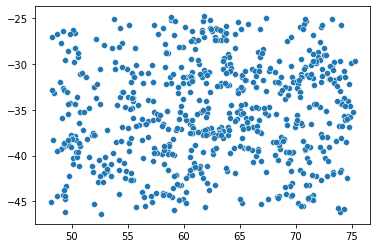

In [8]:
print("galaxies", len(galaxy_data), type(galaxy_data), galaxy_data["ra"].size)
print("clusters", len(cluster_data), type(cluster_data), cluster_data["ra"].size)
sns.scatterplot(cluster_data["ra"],cluster_data["dec"])
print("cluster masses", np.log10(cluster_data["halo_mass"].min()),np.log10(cluster_data["halo_mass"].max()))